# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [2, 3,4]].values

In [11]:
dataset.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [12]:
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

## Using the elbow method to find the optimal number of clusters

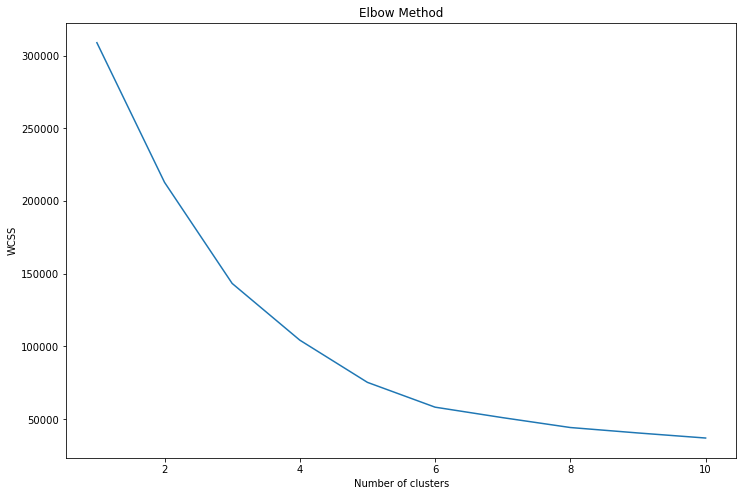

In [13]:
plt.rcParams['figure.figsize'] = (12,8)
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## Training the K-Means model on the dataset

In [14]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

In [15]:
clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 3, 5,
       0, 1, 3, 5, 5, 5, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 3, 5, 3, 3, 3, 5,
       3, 3, 5, 5, 3, 3, 3, 3, 3, 5, 3, 5, 5, 3, 3, 5, 3, 3, 5, 3, 3, 5,
       5, 3, 3, 5, 3, 5, 5, 5, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5, 3, 3, 3, 3,
       3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 4, 5, 4, 2, 4, 2, 4, 2, 4,
       5, 4, 2, 4, 2, 4, 2, 4, 2, 4, 5, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4], dtype=int32)

In [ ]:
clusters

## Visualising the clusters

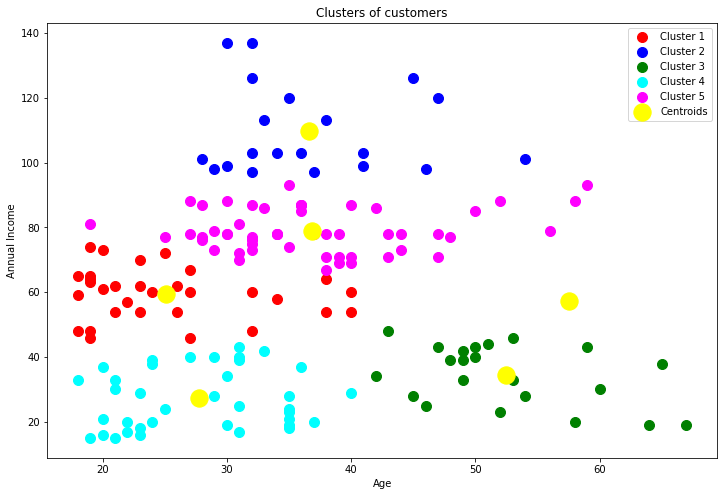

In [8]:
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[clusters == 4, 0], X[clusters == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

Theory
-------
wcss: within cluster sum of squares